In [ ]:
# Emotion detection with Python and OpenCV

In [13]:
!pip install ultralytics

In [14]:
import io
import os
import re
import json
import torch
import html
import base64
import itertools

import numpy as np
from IPython.core.display import display, HTML
from torch.utils.data import Dataset, DataLoader
# Import AdamW from torch.optim instead of transformers
from torch.optim import AdamW
from transformers import (
    AutoModelForCausalLM,
    AutoProcessor,
    get_scheduler
)
from tqdm import tqdm
from typing import List, Dict, Any, Tuple, Generator
from peft import LoraConfig, get_peft_model
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw, ImageFont

In [15]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.6/112.6 GB disk)


In [17]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Your Api Key")
project = rf.workspace("emotion-detection-5nu8v").project("facial-emotion-trpg7-07png")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Facial-Emotion-1 in yolov11:: 100%|██████████| 2418/2418 [00:00<00:00, 9636.93it/s]


In [19]:
dataset.location

'/content/Facial-Emotion-1'

In [20]:
!yolo task = detect mode = train data={dataset.location}/data.yaml model ='yolo11n.pt' epochs = 50 imgsz =640

100% 5.35M/5.35M [00:00<00:00, 109MB/s]
Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Facial-Emotion-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, per

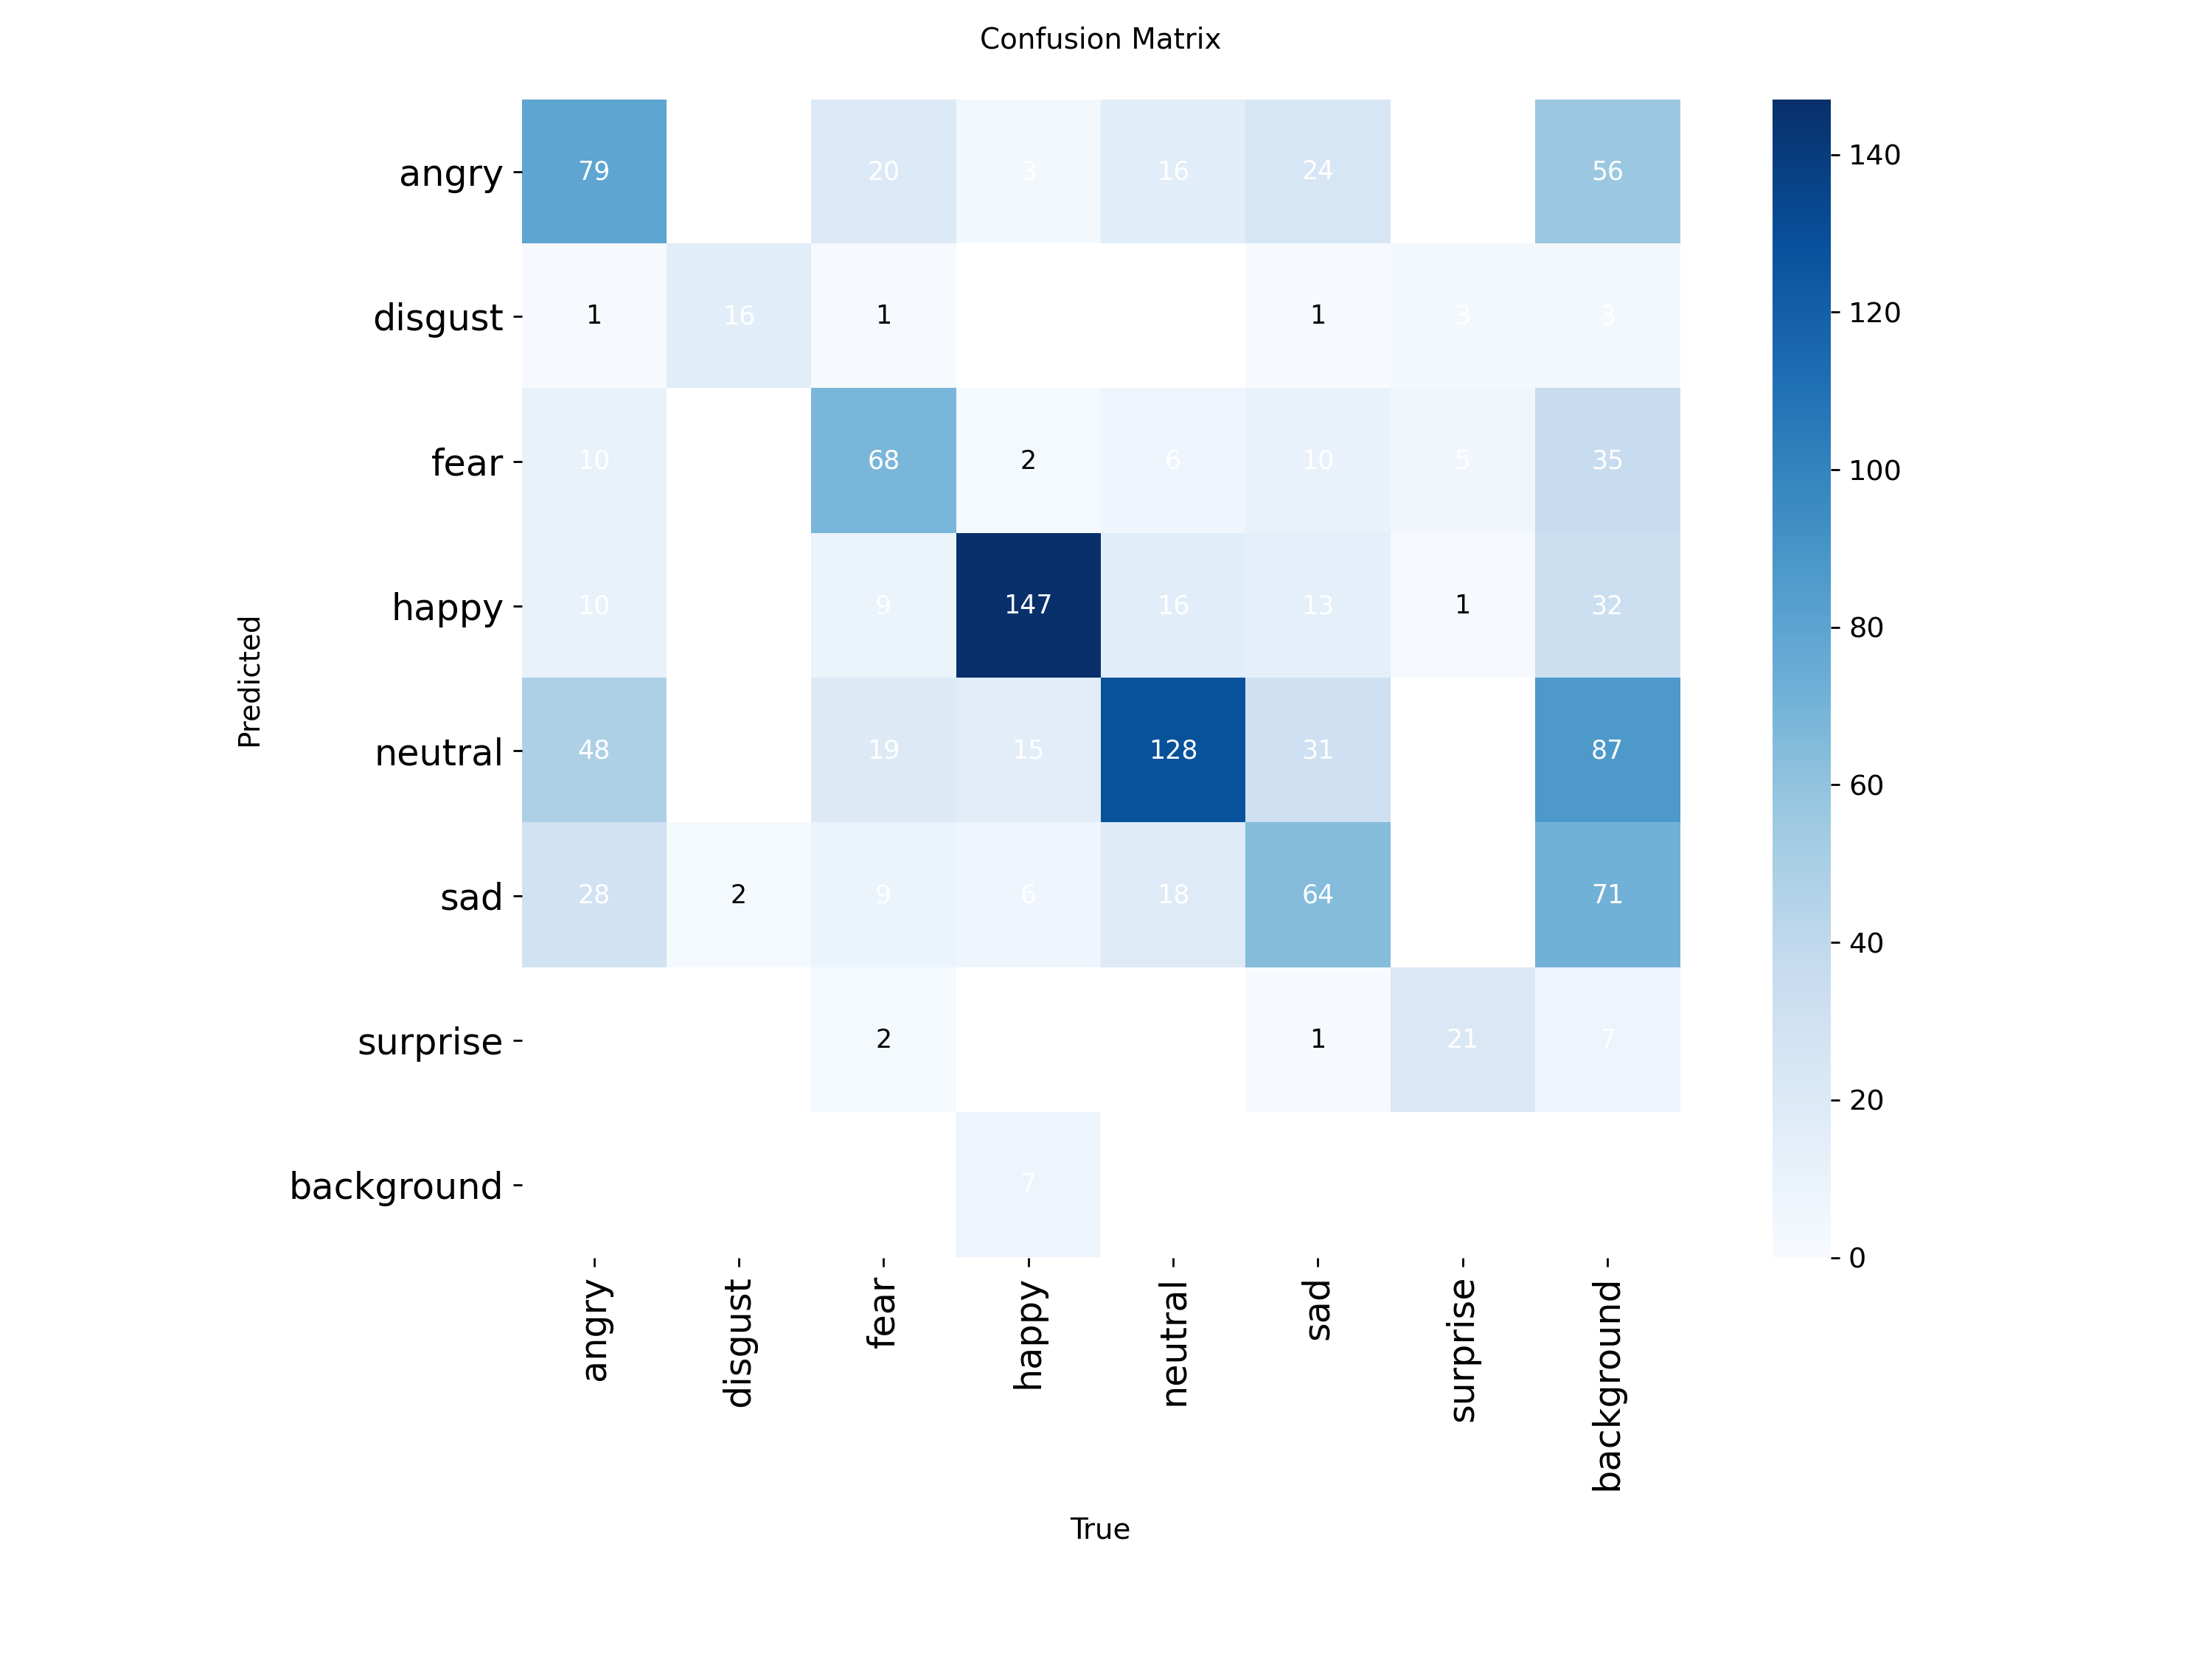

In [21]:
Image("/content/runs/detect/train/confusion_matrix.png",width =600)

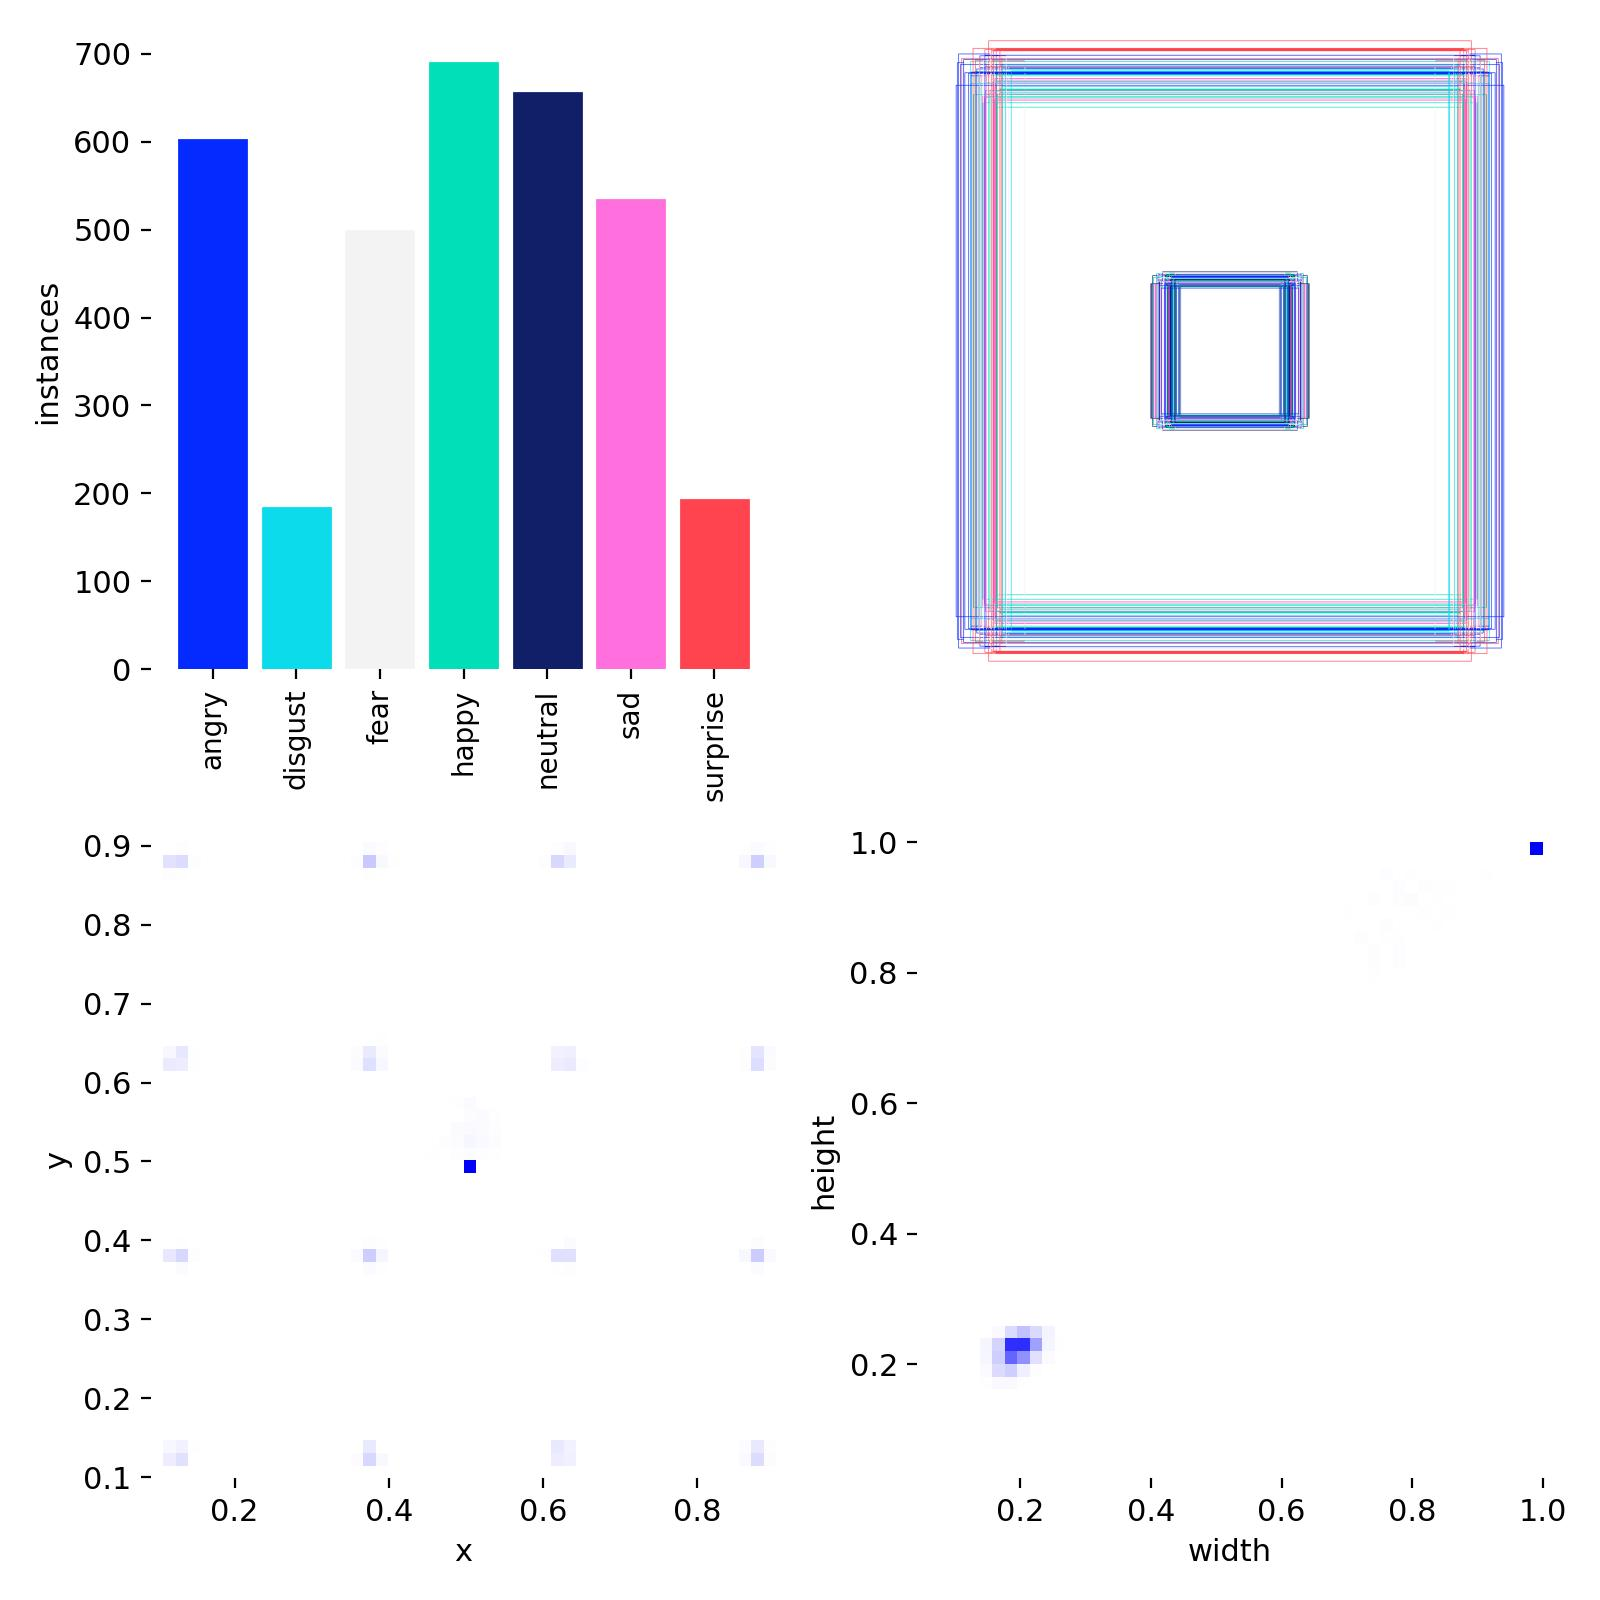

In [22]:
Image ("/content/runs/detect/train/labels.jpg",width = 600)

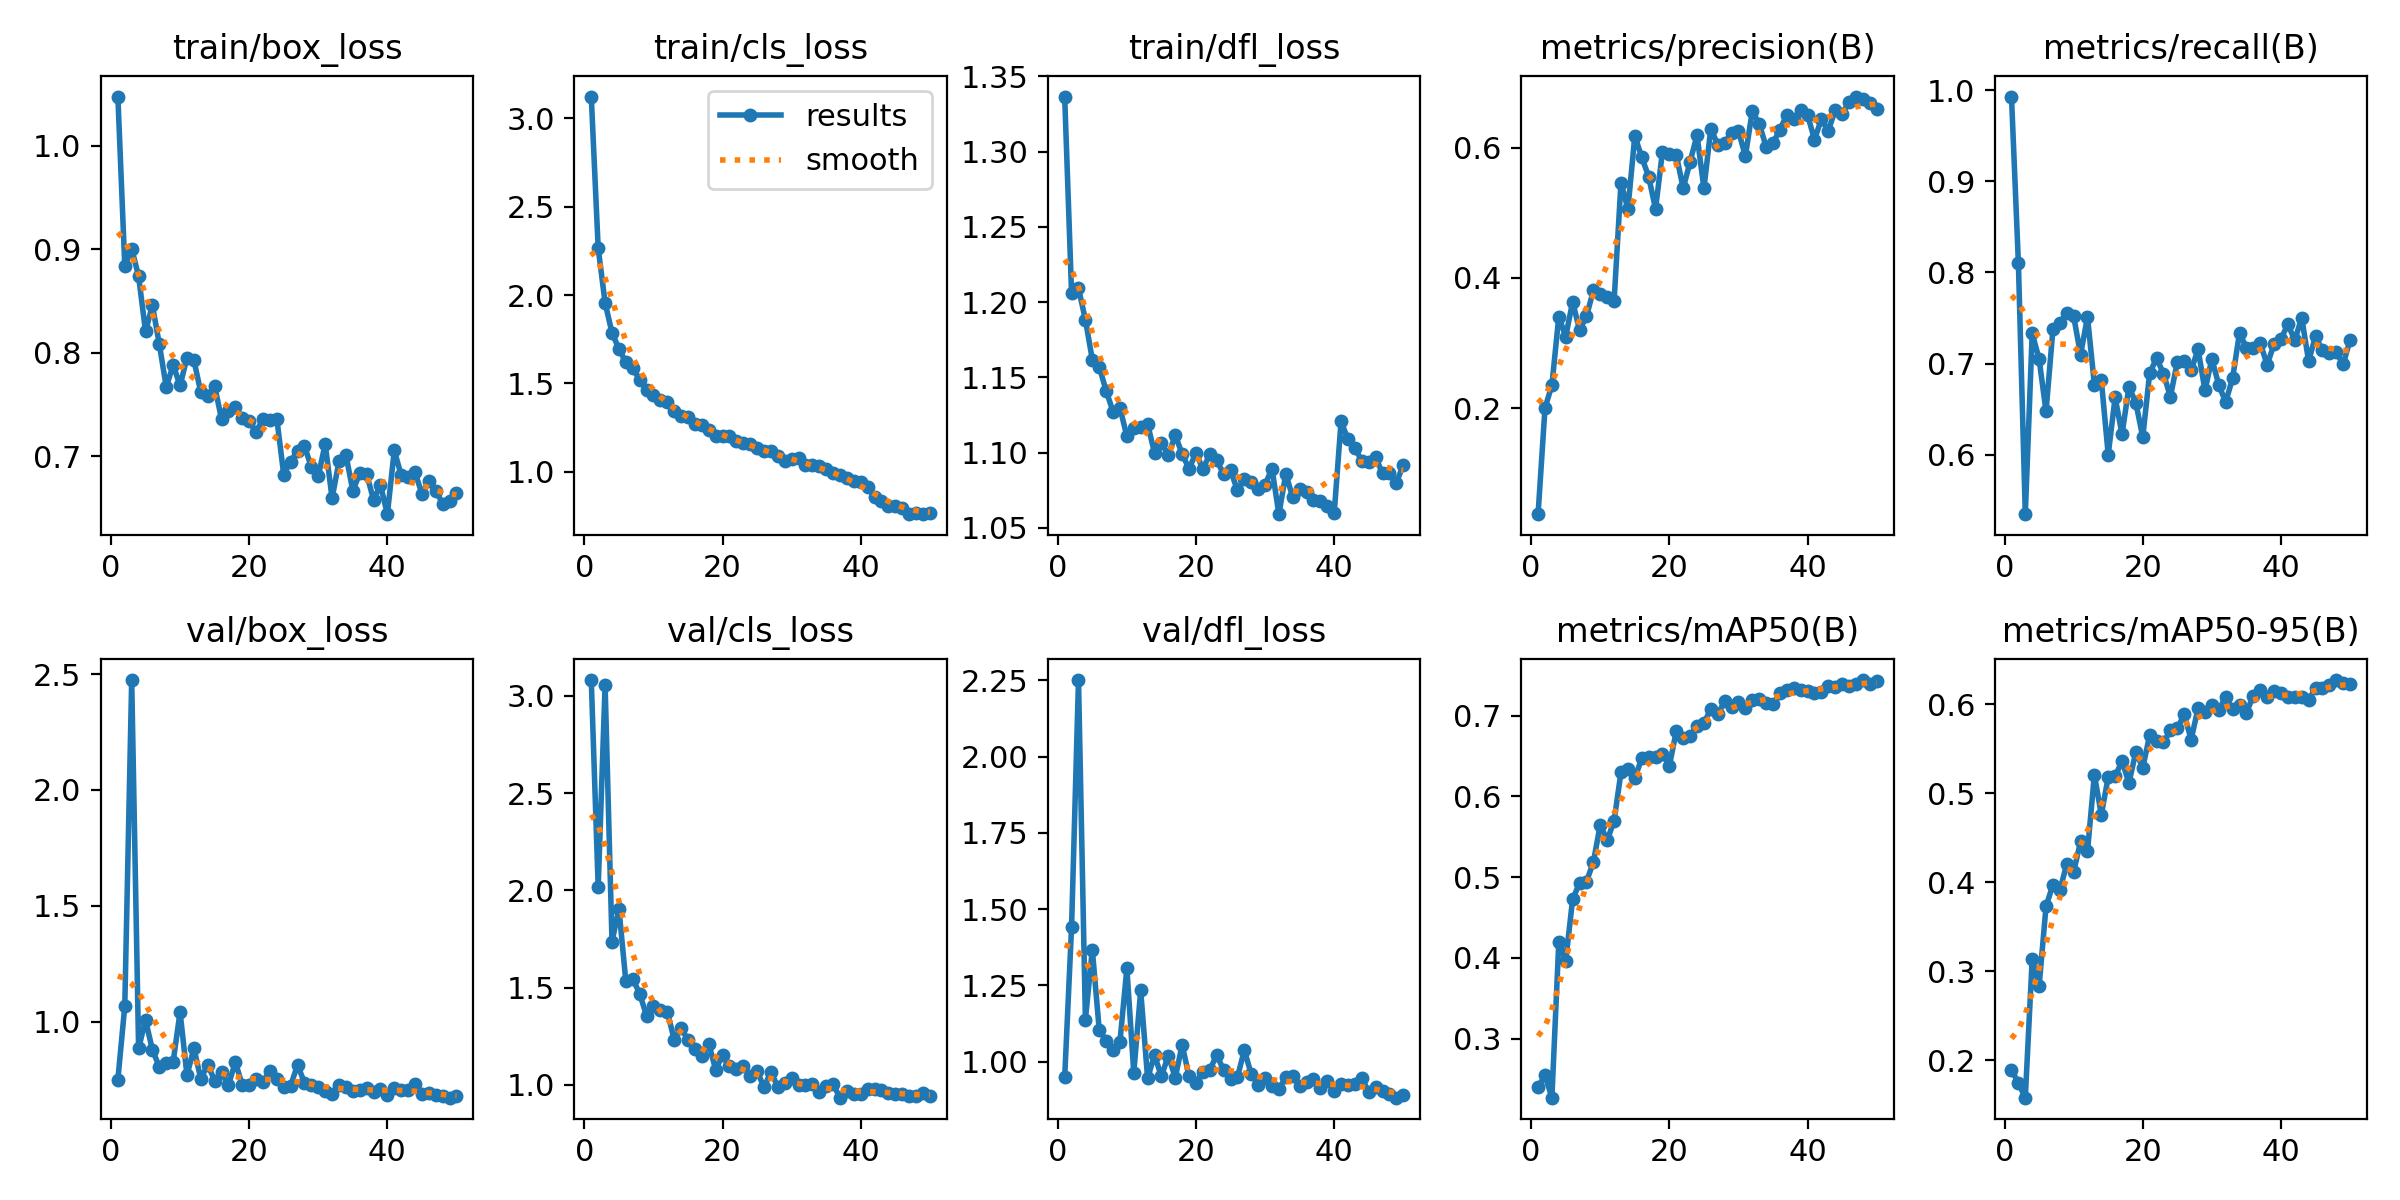

In [24]:
Image("/content/runs/detect/train/results.png" ,width = 600)

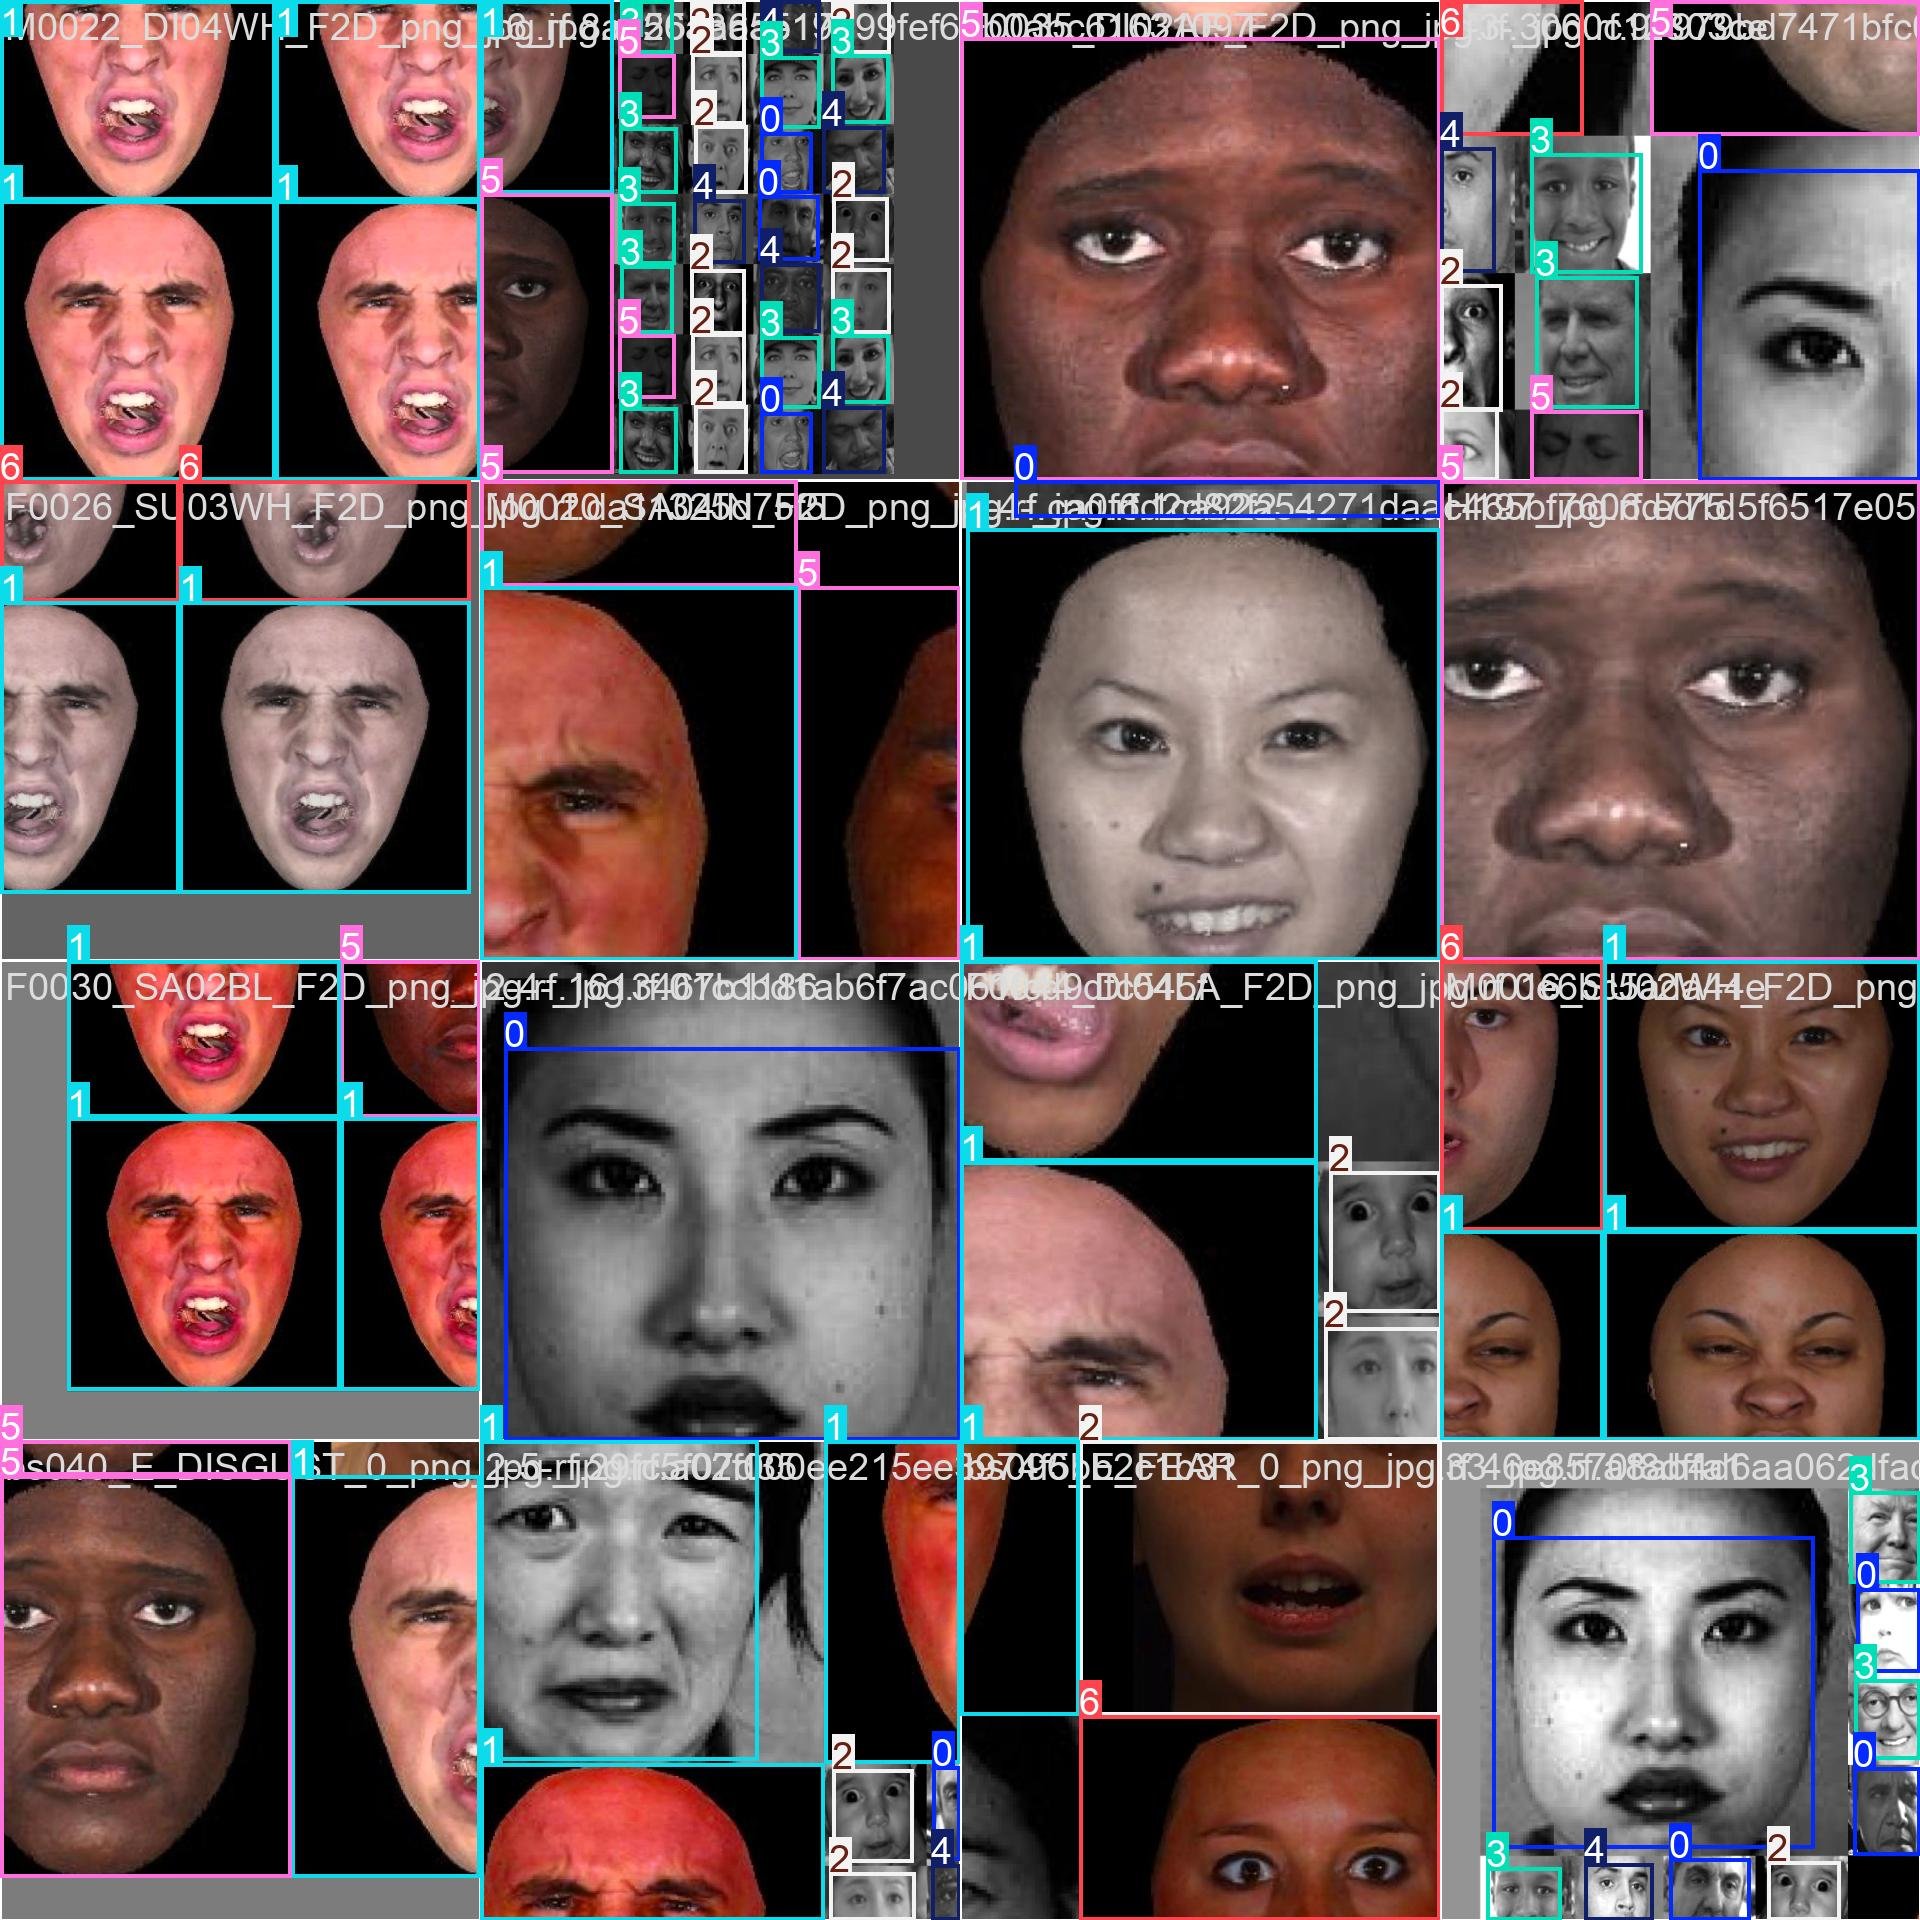

In [26]:
Image("/content/runs/detect/train/train_batch0.jpg",width= 600)

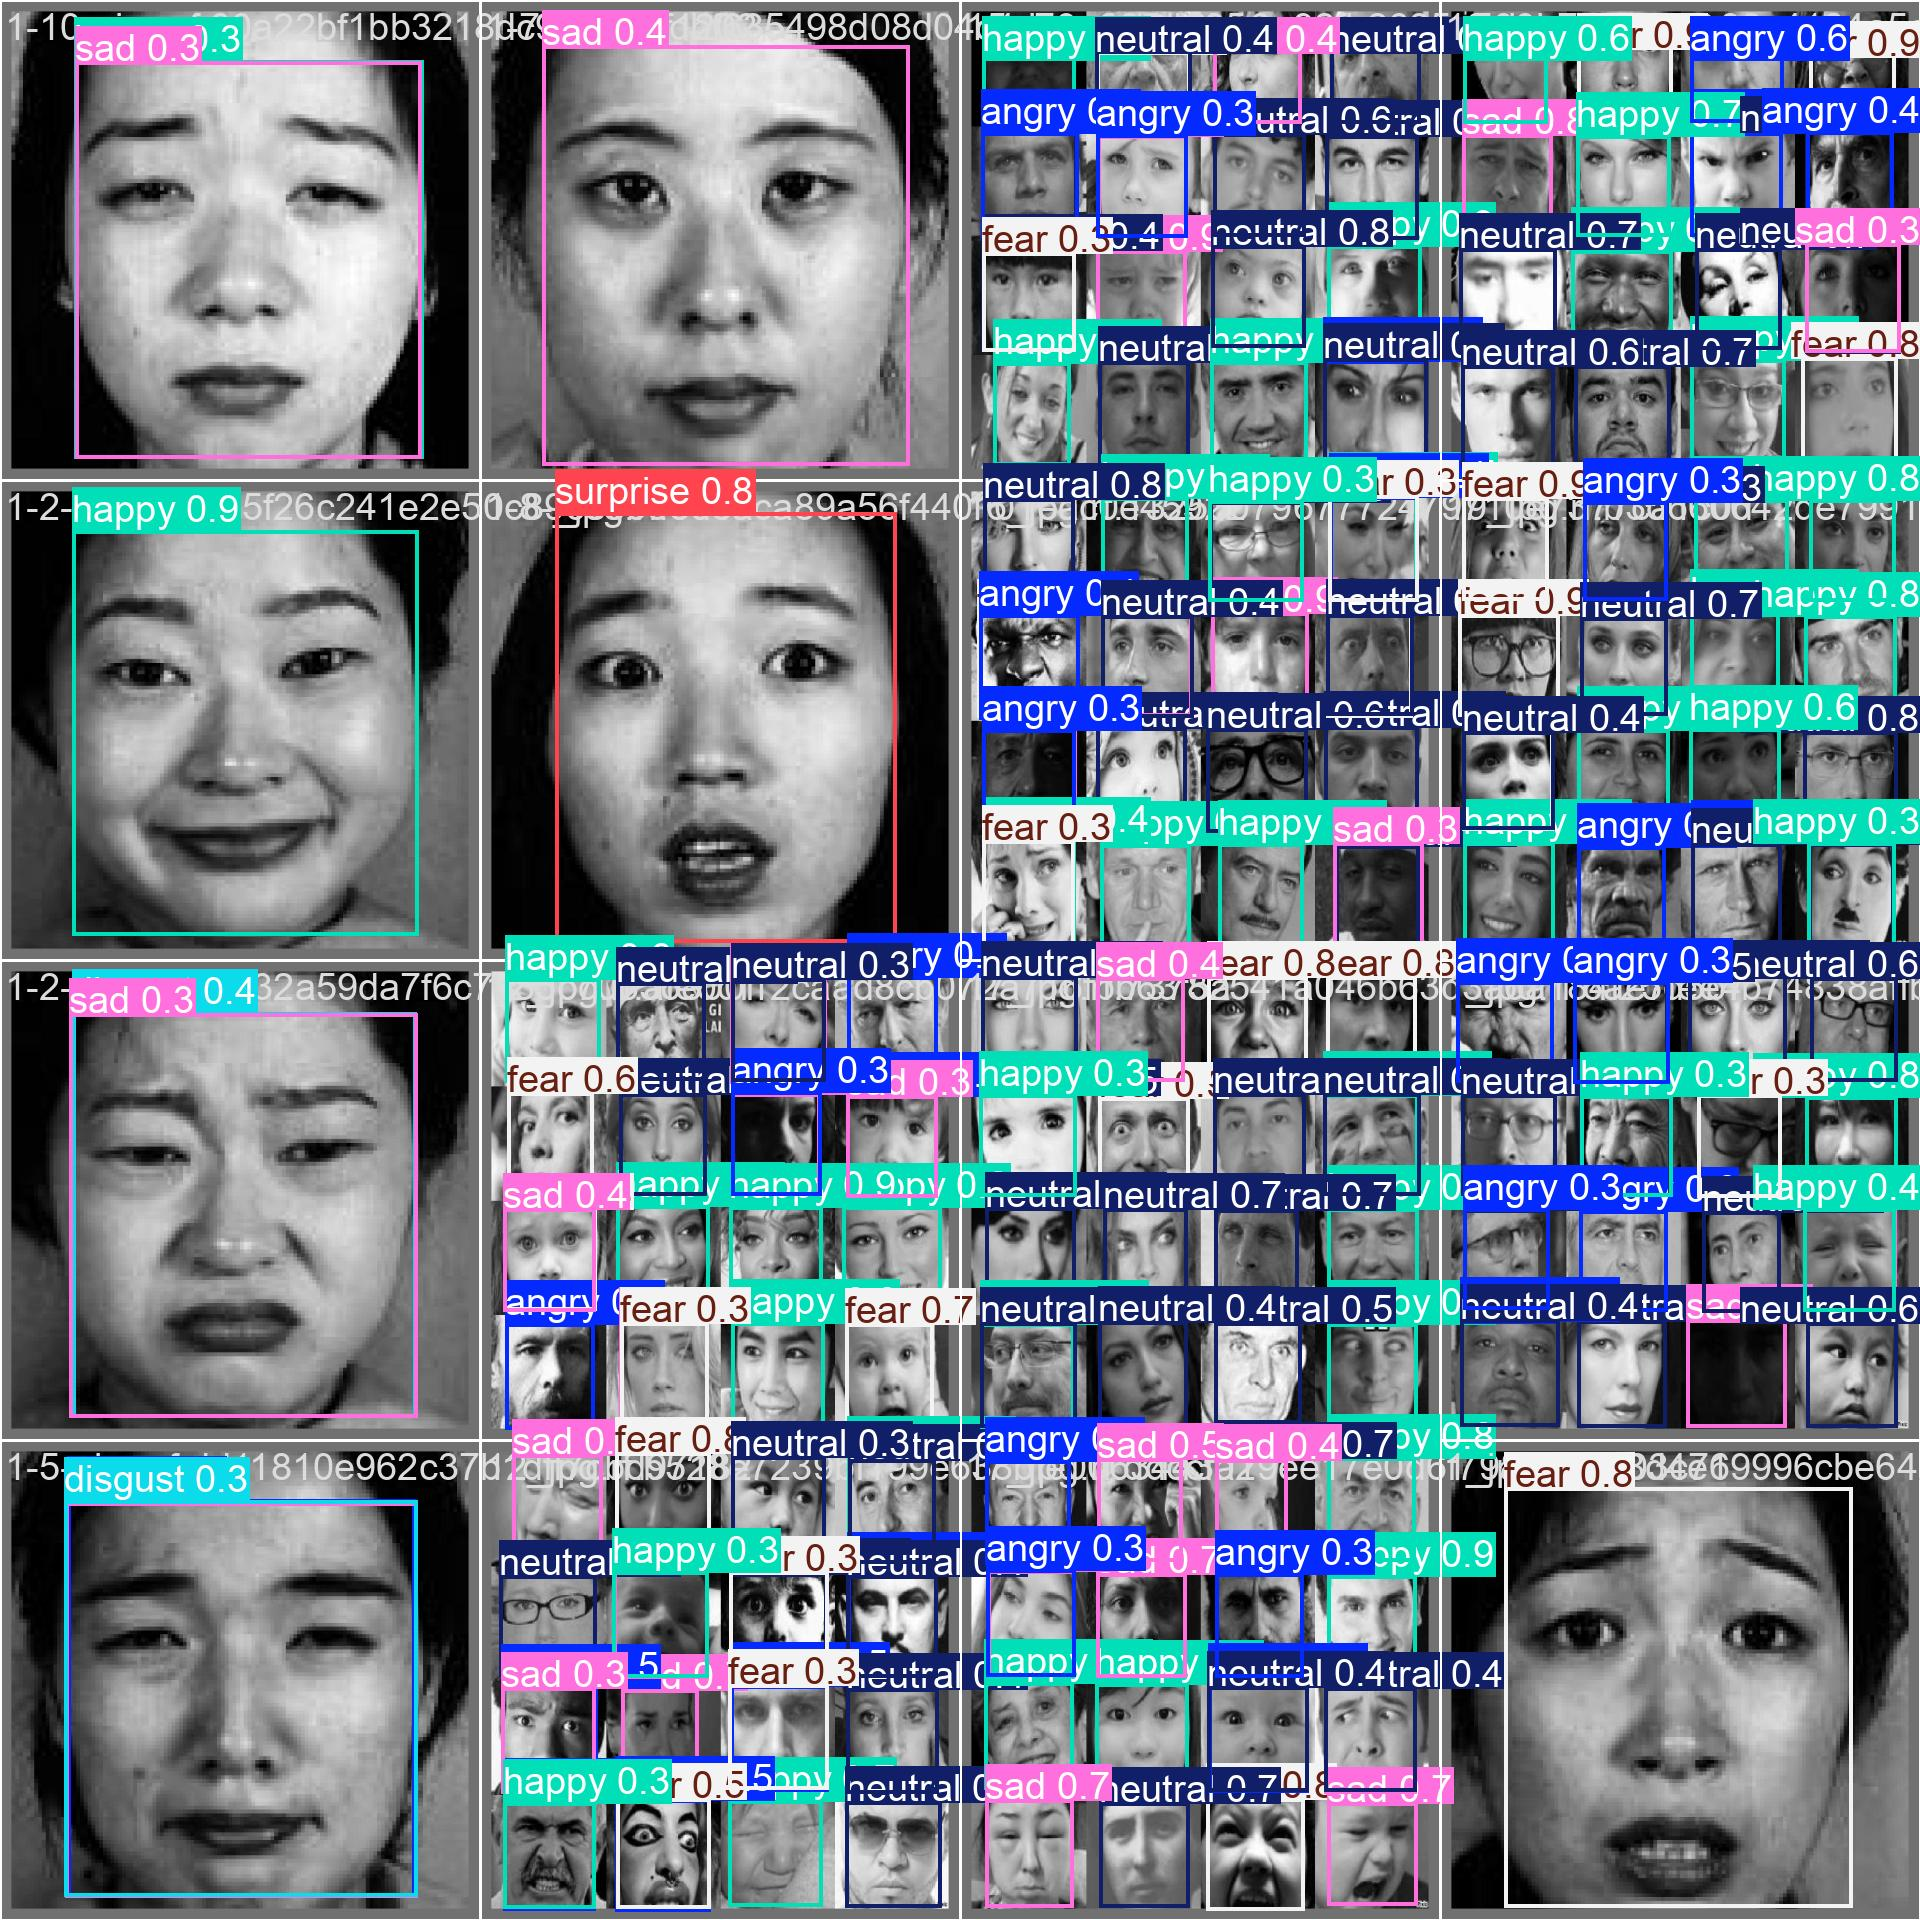

In [27]:
Image("/content/runs/detect/train/val_batch0_pred.jpg",width= 600)

In [29]:
!yolo task =detect model=val model ="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

WARNING ⚠️ 'mode' argument is missing. Valid modes are ['track', 'benchmark', 'export', 'train', 'predict', 'val']. Using default 'mode=train'.
Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Facial-Emotion-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/runs/detect/train/weights/best.pt, momentum=0.937, mosai

In [30]:
!yolo task =detect model=predict model ="/content/runs/detect/train/weights/best.pt"  conf=0.25  source={dataset.location}/test/images save = True

WARNING ⚠️ 'mode' argument is missing. Valid modes are ['val', 'benchmark', 'predict', 'export', 'track', 'train']. Using default 'mode=train'.
WARNING ⚠️ 'data' argument is missing. Using default 'data=coco8.yaml'.
Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=0.25, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/runs/dete

Error: No folders matching the pattern '/content/runs/detect/predict*' found in '/content/runs/detect/'. The prediction step might not have created the output directory.
